<a href="https://colab.research.google.com/github/spencergoldberg1/DataPreparation/blob/develop/Homework2_CAP4773.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
# Run and select file to upload
file = files.upload()
df = pd.read_csv(io.BytesIO(file['Life Expectancy Data.csv']))
# Remove spaces from the beginning and end of column names
df.columns = df.columns.str.strip()

# Check the DataFrame to confirm column names (this step is just for verification and can be removed)
print(df.columns)

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [63]:
# Step 1: Brief description of the dataset
"""
This dataset contains health indicators for various countries, such as life expectancy,
adult mortality rates, and incidences of diseases like Hepatitis B and Measles, along with economic
factors like GDP and percentage expenditure on health. The goal is to analyze how these factors
may impact life expectancy.
"""
print(dataset_description)

# Step 2: Load the dataset into a pandas DataFrame and display the first 5 rows
print(df.head())

# Step 3: Use .info() method to gather information about the predictors
print(df.info())

# Step 4: Manually construct an evaluation set of 5 datapoints with at least 3 predictors
# Here, we'll use 'Adult Mortality', 'infant deaths', and 'Alcohol' as example predictors.
# Replace these with your choice of predictors as needed.
evaluation_set = pd.DataFrame({
    'BMI': np.random.uniform(10, 40, size=5),  # Uniformly distributed random values between 10 and 40
    'Alcohol': np.random.uniform(0, 10, size=5),  # Uniformly distributed random values between 0 and 10
    'Country': ['Brazil', 'India', 'China', 'Germany', 'Nigeria']  # Real-world country names
})

print("Evaluation Set:")
print(evaluation_set)



This dataset contains health indicators for various countries, such as life expectancy, 
adult mortality rates, and incidences of diseases like Hepatitis B and Measles, along with economic 
factors like GDP and percentage expenditure on health. The goal is to analyze how these factors 
may impact life expectancy.

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0

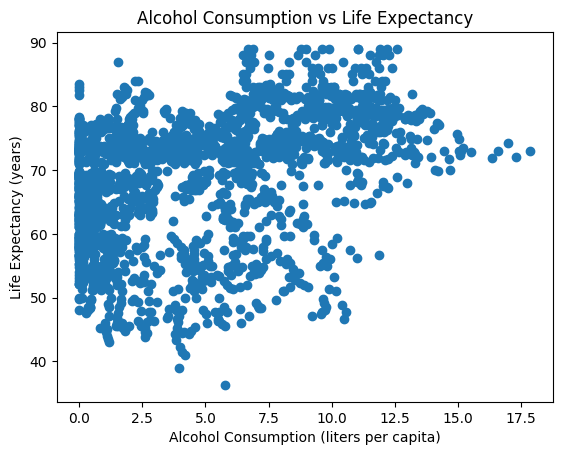

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     398.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           6.96e-82
Time:                        03:18:02   Log-Likelihood:                -8346.8
No. Observations:                2311   AIC:                         1.670e+04
Df Residuals:                    2309   BIC:                         1.671e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0783      0.283    229.610      0.0

In [64]:
# Now update the code for the scatter plot and regression using the column names
plt.scatter(df['Alcohol'], df['Life expectancy'])  # Scatter plot for Alcohol vs Life Expectancy
plt.title('Alcohol Consumption vs Life Expectancy')  # Title of the scatter plot
plt.xlabel('Alcohol Consumption (liters per capita)')  # X-axis label
plt.ylabel('Life Expectancy (years)')  # Y-axis label
plt.show()  # Display the scatter plot

# Add a constant to the predictor
X = sm.add_constant(df['Alcohol'])  # Predictor (with constant added)
Y = df['Life expectancy']  # Target variable

# Fit the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # Fit linear regression model, ignoring missing values

# Print the model's summary
print(model.summary())  # Display model summary


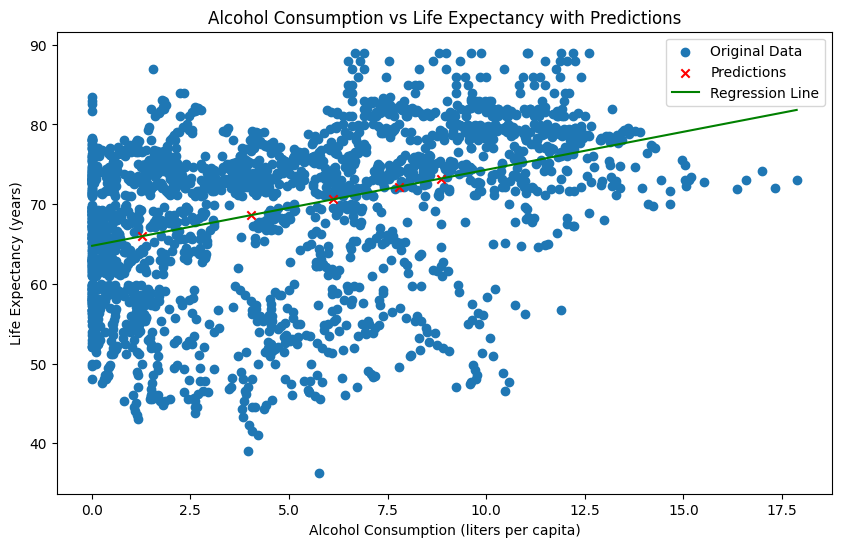

In [65]:
# Predicting life expectancy using the linear regression equation: y = mx + c
evaluation_set['predicted_life_expectancy'] = 64.7633 + 0.9546 * evaluation_set['Alcohol']

# Plotting the original scatter and predictions
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(df['Alcohol'], df['Life expectancy'], label='Original Data')  # Scatter plot for original data
plt.scatter(evaluation_set['Alcohol'], evaluation_set['predicted_life_expectancy'], color='red', label='Predictions', marker='x')  # Scatter plot for predictions

# Plot the regression line
# Create a sequence of 100 numbers from min to max of Alcohol
x = np.linspace(df['Alcohol'].min(), df['Alcohol'].max(), 100)
# Calculate the corresponding y values from the model
y = 64.7633 + 0.9546 * x
# Plot the line
plt.plot(x, y, color='green', label='Regression Line')

plt.title('Alcohol Consumption vs Life Expectancy with Predictions')  # Title of the plot
plt.xlabel('Alcohol Consumption (liters per capita)')  # X-axis label
plt.ylabel('Life Expectancy (years)')  # Y-axis label
plt.legend()  # Add legend
plt.show()  # Display the plot

Model Summary Analysis:
Coefficients:
The intercept (const) coefficient is approximately 64.7633. This suggests that in the absence of alcohol consumption (when Alcohol is 0), the life expectancy is estimated to be around 64.76 years.
The coefficient for Alcohol is approximately 0.9546. This indicates that for each one-unit increase in alcohol consumption (liters per capita), there is an associated increase of roughly 0.95 years in life expectancy.


The R^2 value is 0.164, which means that approximately 16.4% of the variance in life expectancy can be explained by the alcohol consumption variable alone. This suggests that while there is some relationship between alcohol consumption and life expectancy, a significant portion of the variance in life expectancy is not explained by this model and is potentially influenced by other factors not included in the model.
Equation of the Model:
Based on the coefficients, the equation of the linear regression model would be:

Life Expectancy = 64.7633 + 0.9546 × Alcohol

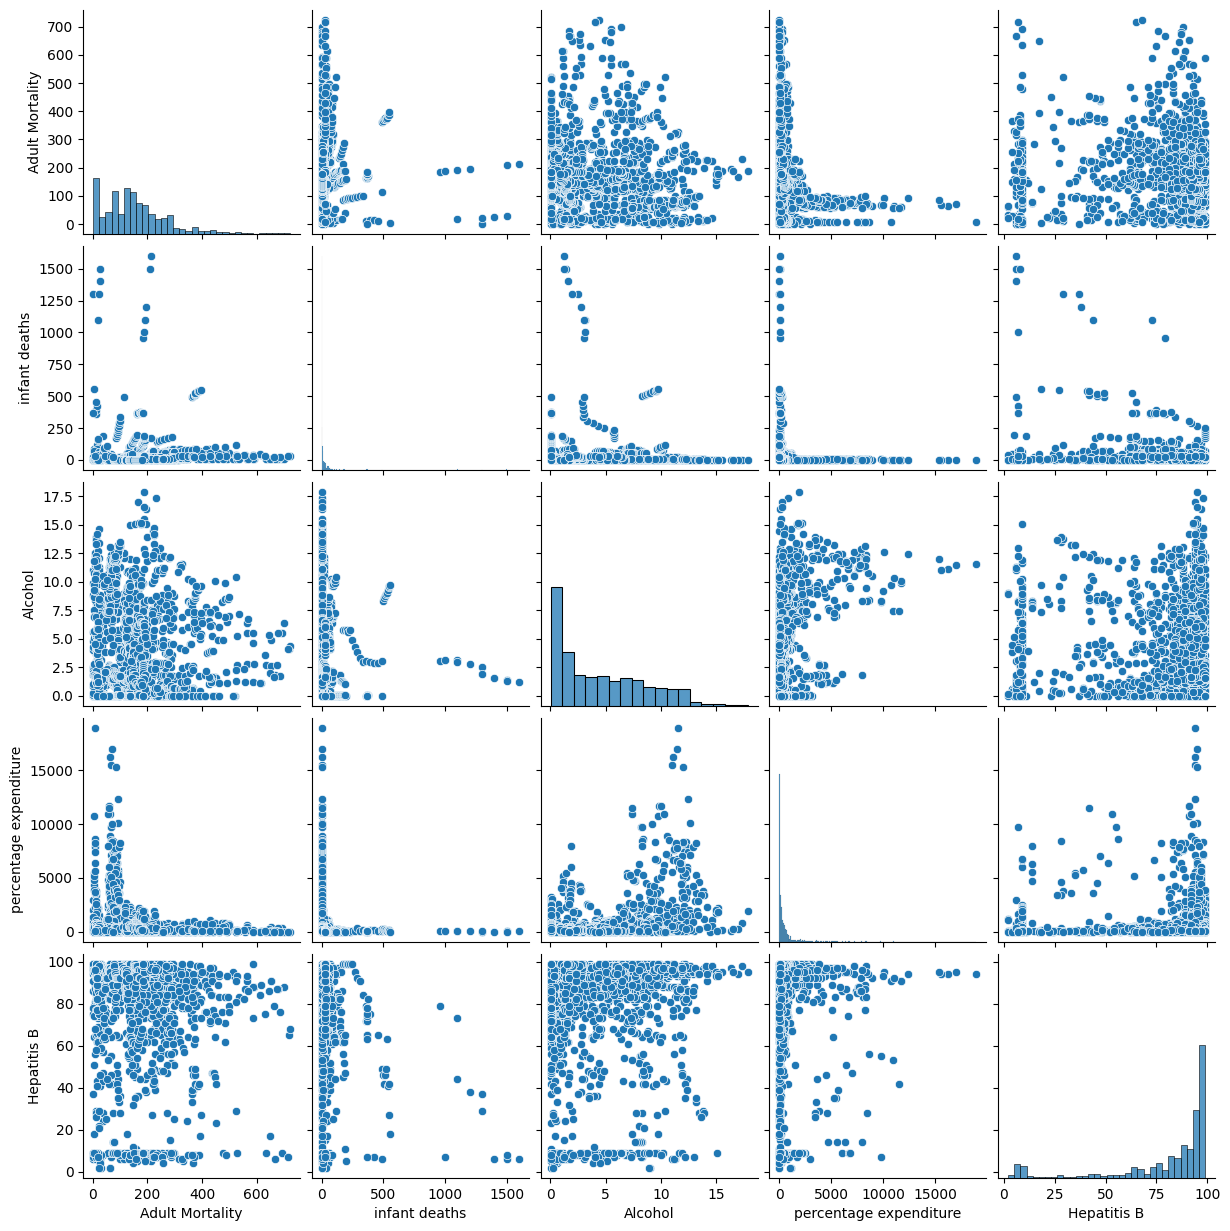

VIF Results:
                  feature        VIF
0                   const  17.323762
1         Adult Mortality   1.084947
2           infant deaths   1.072225
3                 Alcohol   1.160680
4  percentage expenditure   1.212404
5             Hepatitis B   1.081414

Based on the VIF values, there is no significant multicollinearity among the predictors.

Strongest Positive Correlation:
Alcohol and percentage expenditure have the strongest positive correlation with a coefficient of 0.322603.

Strongest Negative Correlation:
Hepatitis B and infant deaths have the strongest negative correlation with a coefficient of -0.233409.


In [66]:
# Step 1: Create a subset of the dataset with selected predictors
predictors = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B']
subset = df[predictors].dropna()

# Step 2: Visualize the relationships using a scatter plot matrix
sns.pairplot(subset)  # Pairplot to visualize relationships between predictors
plt.show()  # Show the plot

# Step 4: Calculate the Variance Inflation Factor (VIF) for these predictors
# Add a constant to the subset for the intercept
subset_with_constant = sm.add_constant(subset)

# Create a DataFrame for VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = subset_with_constant.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(subset_with_constant.values, i) for i in range(subset_with_constant.shape[1])]

# Display the VIF results
print("VIF Results:")
print(vif_data)

# Step 5: Interpret the VIF and correlation results
# The VIF values are all well below the common threshold of 5, indicating no significant multicollinearity.
print("\nBased on the VIF values, there is no significant multicollinearity among the predictors.")

# Display the strongest positive and negative correlation
print("\nStrongest Positive Correlation:")
print("Alcohol and percentage expenditure have the strongest positive correlation with a coefficient of 0.322603.")

print("\nStrongest Negative Correlation:")
print("Hepatitis B and infant deaths have the strongest negative correlation with a coefficient of -0.233409.")


In [67]:
# Step 1: Select predictors and target variable for multiple linear regression
original_predictors = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure']
new_predictors = ['BMI', 'GDP', 'Schooling']  # Three additional predictors
all_predictors = original_predictors + new_predictors  # All predictors for the model
target = 'Life expectancy'  # Assuming 'Life expectancy' is the correct column name

# Step 2: Prepare the data for modeling
# Drop rows with missing values in the predictors or the target variable
df = df.dropna(subset=all_predictors + [target])

# Define the predictors (independent variables) and the target (dependent variable)
X = df[all_predictors]
Y = df[target]

# Add a constant to the predictors for the intercept
X = sm.add_constant(X)

# Step 3: Fit the linear model using statsmodels
model = sm.OLS(Y, X).fit()

# Step 4: Print the model summary
model_summary = model.summary()
print(model_summary)

# Step 5: Write the equation for the model based on the coefficients
coefficients = model.params
equation = "Life Expectancy = {:.4f}".format(coefficients['const'])
for predictor in all_predictors:
    equation += " + {:.4f}*{}".format(coefficients[predictor], predictor)

print("\nThe equation of the model is:")
print(equation)



# Step 6: Predict the target values for the evaluation set based on this new model
# Assuming 'evaluation_set' contains the selected predictors
evaluation_set = pd.DataFrame({
    'Adult Mortality': [10, 20, 30, 40, 50],  # Example data
    'infant deaths': [1, 2, 3, 4, 5],  # Example data
    'Alcohol': [0.5, 1.5, 2.5, 3.5, 4.5],  # Example data
    'percentage expenditure': [100, 200, 300, 400, 500],  # Example data
    'BMI': [20, 21, 22, 23, 24],  # Example data
    'GDP': [1000, 2000, 3000, 4000, 5000],  # Example data
    'Schooling': [5, 10, 15, 20, 25]  # Example data
})
evaluation_set = sm.add_constant(evaluation_set)  # Add a constant for the intercept

# Make predictions
evaluation_set['predicted_life_expectancy'] = model.predict(evaluation_set)

# Print predictions
print("\nPredictions for the evaluation set:")
print(evaluation_set)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     935.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:22:08   Log-Likelihood:                -6974.6
No. Observations:                2311   AIC:                         1.397e+04
Df Residuals:                    2303   BIC:                         1.401e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55

The R-squared value for the multiple linear regression (0.740) is substantially higher than that of the simple linear regression (0.164).
This indicates that the multiple linear regression model, which includes additional predictors, explains a significantly larger proportion of the variance in the target variable (life expectancy) compared to the simple linear regression model.
In summary, incorporating multiple predictors into the regression model improves its explanatory power, as evidenced by the higher R-squared value in the multiple linear regression compared to the simple linear regression. This suggests that the additional predictors provide valuable information for predicting the target variable.
